## Did Steroids Make Baseball More Fun?

Baseball was more fun in the late nineties. Why? Was the game actually more exciting or am I looking back through the rose tinted glasses of nostalgia?

What constitutes fun from a fan's perspective? I will measure how fun each era was based on the following questions:
- How many exciting plays were made per game?
> Exciting plays consist of:\
> extra base hits, home runs, double plays, triple plays, stolen bases
- How close were games?
- How many runs were scored each game on average?
- How many *special* games occured?
> Special games include:\
> no hitters, perfect games, hitting for the cycle, 3 home run games, extra inning games (weighted less heavily)
- How many teams were "in the hunt" for the playoffs?
- How many different teams appeared in and won the world series?
- How many teams were represented in the all-star game?
- How many fans attended games?

### The Data

The dataset that I am using is the Lahman Database, also known as baseball-reference.com. The dataset contains hitting and fielding data from the 1871-2023 Major League Baseball seasons.

Lahman, S. (2023). Lahman Baseball Database. baseball-reference.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
filepath = "Lahman baseball/baseballdatabank-2023.1/core/"

batting_df = pd.read_csv(filepath + "batting.csv")
players_df = pd.read_csv(filepath + "people.csv")
teams_df = pd.read_csv(filepath + "teams.csv")

### Exploratory Data Analysis

In [3]:
# Data Exploration
print(batting_df.info())
print(batting_df.describe())
print(batting_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112184 entries, 0 to 112183
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  112184 non-null  object 
 1   yearID    112184 non-null  int64  
 2   stint     112184 non-null  int64  
 3   teamID    112184 non-null  object 
 4   lgID      111447 non-null  object 
 5   G         112184 non-null  int64  
 6   AB        112184 non-null  int64  
 7   R         112184 non-null  int64  
 8   H         112184 non-null  int64  
 9   2B        112184 non-null  int64  
 10  3B        112184 non-null  int64  
 11  HR        112184 non-null  int64  
 12  RBI       111428 non-null  float64
 13  SB        109816 non-null  float64
 14  CS        88642 non-null   float64
 15  BB        112184 non-null  int64  
 16  SO        110084 non-null  float64
 17  IBB       75533 non-null   float64
 18  HBP       109368 non-null  float64
 19  SH        106116 non-null  float64
 20  SF  

In [4]:
print(players_df.info())
print(players_df.describe())
print(players_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20676 entries, 0 to 20675
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      20676 non-null  object 
 1   birthYear     20567 non-null  float64
 2   birthMonth    20398 non-null  float64
 3   birthDay      20256 non-null  float64
 4   birthCountry  20617 non-null  object 
 5   birthState    20136 non-null  object 
 6   birthCity     20508 non-null  object 
 7   deathYear     10098 non-null  float64
 8   deathMonth    10097 non-null  float64
 9   deathDay      10096 non-null  float64
 10  deathCountry  10094 non-null  object 
 11  deathState    10038 non-null  object 
 12  deathCity     10089 non-null  object 
 13  nameFirst     20639 non-null  object 
 14  nameLast      20676 non-null  object 
 15  nameGiven     20639 non-null  object 
 16  weight        19864 non-null  float64
 17  height        19944 non-null  float64
 18  bats          19498 non-nu

In [5]:
print(teams_df.info())
print(teams_df.describe())
print(teams_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          3015 non-null   int64  
 1   lgID            2965 non-null   object 
 2   teamID          3015 non-null   object 
 3   franchID        3015 non-null   object 
 4   divID           1498 non-null   object 
 5   Rank            3015 non-null   int64  
 6   G               3015 non-null   int64  
 7   Ghome           2616 non-null   float64
 8   W               3015 non-null   int64  
 9   L               3015 non-null   int64  
 10  DivWin          1470 non-null   object 
 11  WCWin           834 non-null    object 
 12  LgWin           2987 non-null   object 
 13  WSWin           2658 non-null   object 
 14  R               3015 non-null   int64  
 15  AB              3015 non-null   int64  
 16  H               3015 non-null   int64  
 17  2B              3015 non-null   i

In [6]:
batting_df = batting_df[batting_df['yearID'] > 1972]
teams_df = teams_df[teams_df['yearID'] > 1972]

batting_df = batting_df.drop(['stint', 'lgID', 'GIDP', 'CS', 
                              'SF', 'SH'], axis=1)

teams_df = teams_df.drop(['teamIDBR', 'teamIDlahman45', 'teamIDretro', 'Ghome', 'park', 'BPF', 'PPF'], axis=1)

In [7]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 1613 to 3014
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yearID      1402 non-null   int64  
 1   lgID        1402 non-null   object 
 2   teamID      1402 non-null   object 
 3   franchID    1402 non-null   object 
 4   divID       1402 non-null   object 
 5   Rank        1402 non-null   int64  
 6   G           1402 non-null   int64  
 7   W           1402 non-null   int64  
 8   L           1402 non-null   int64  
 9   DivWin      1374 non-null   object 
 10  WCWin       834 non-null    object 
 11  LgWin       1374 non-null   object 
 12  WSWin       1374 non-null   object 
 13  R           1402 non-null   int64  
 14  AB          1402 non-null   int64  
 15  H           1402 non-null   int64  
 16  2B          1402 non-null   int64  
 17  3B          1402 non-null   int64  
 18  HR          1402 non-null   int64  
 19  BB          1402 non-null   i

In [9]:
pre_batting = batting_df[batting_df['yearID'] < 1994]
pre_teams = teams_df[teams_df['yearID'] < 1994]

mask_teams = (teams_df['yearID'] >= 1994) & (teams_df['yearID'] <= 2004)
mask_batting = (batting_df['yearID'] >= 1994) & (batting_df['yearID'] <= 2004)


roid_teams = teams_df.loc[mask_teams]
roid_batting = batting_df.loc[mask_batting]

post_teams = teams_df[teams_df['yearID'] > 2004]
post_batting = batting_df[batting_df['yearID'] > 2004]


In [77]:
test = teams_df.groupby(['teamID', 'yearID'])

In [110]:
pre_agg_data = pre_teams.groupby(['teamID']).agg(
    total_attendance=('attendance', 'sum'),
    avg_hr=('HR', 'mean'),
    total_years=('yearID', 'count'),
    total_wins=('W','sum'),
    total_losses=('L','sum'),
    total_g=('G', 'sum')
)

roid_agg_data = roid_teams.groupby(['teamID']).agg(
    total_attendance=('attendance', 'sum'),
    avg_hr=('HR', 'mean'),
    total_years=('yearID', 'count'),
    total_wins=('W','sum'),
    total_losses=('L','sum'),
    total_g=('G', 'sum')
)

post_agg_data = post_teams.groupby(['teamID']).agg(
    total_attendance=('attendance', 'sum'),
    avg_hr=('HR', 'mean'),
    total_years=('yearID', 'count'),
    total_wins=('W','sum'),
    total_losses=('L','sum'),
    total_g=('G', 'sum')
)

pre_agg_data['win_pct'] = pre_agg_data['total_wins'] / (pre_agg_data['total_wins'] + pre_agg_data['total_losses'])
roid_agg_data['win_pct'] = roid_agg_data['total_wins'] / (roid_agg_data['total_wins'] + roid_agg_data['total_losses'])
post_agg_data['win_pct'] = post_agg_data['total_wins'] / (post_agg_data['total_wins'] + post_agg_data['total_losses'])


In [115]:
pre_agg_data.head(5)

,total_attendance,avg_hr,total_years,total_wins,total_losses,total_g,win_pct
teamID,,,,,,,
ATL,28781860.0,130.857143,21,1570,1765,3339,0.470765
BAL,38751005.0,151.380952,21,1772,1562,3335,0.531494
BOS,42963354.0,140.761905,21,1784,1557,3342,0.533972
CAL,43258893.0,125.095238,21,1631,1716,3348,0.487302
CHA,33193838.0,126.333333,21,1649,1686,3340,0.494453


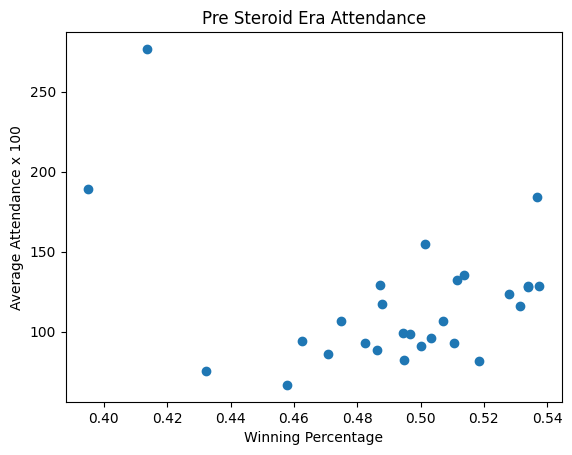

In [121]:
xpoints = pre_agg_data['win_pct']
ypoints = (pre_agg_data['total_attendance'] / pre_agg_data['total_g']) / 100

plt.scatter(xpoints, ypoints)
plt.xlabel('Winning Percentage')
plt.ylabel('Average Attendance x 100')
plt.title('Pre Steroid Era Attendance')
plt.show()

Aside from a couple clear outliers with low winning percentages and high attendance, there does appear to be a clear relationship between winning percentage and average attendance. The two outliers are Colorado and Florida who only existed for one season in the pre-steroid era. This explains the high attendance, as people in these areas would have been excited to have a new franchise despite their poor performance on the field.

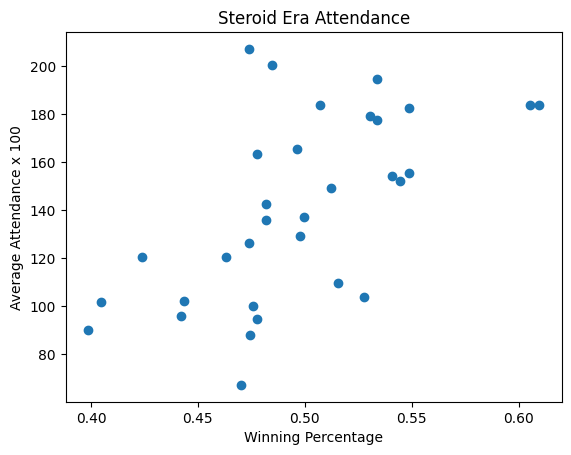

In [120]:
xpoints = roid_agg_data['win_pct']
ypoints = (roid_agg_data['total_attendance'] / roid_agg_data['total_g']) / 100

plt.scatter(xpoints, ypoints)
plt.xlabel('Winning Percentage')
plt.ylabel('Average Attendance x 100')
plt.title('Steroid Era Attendance')
plt.show()

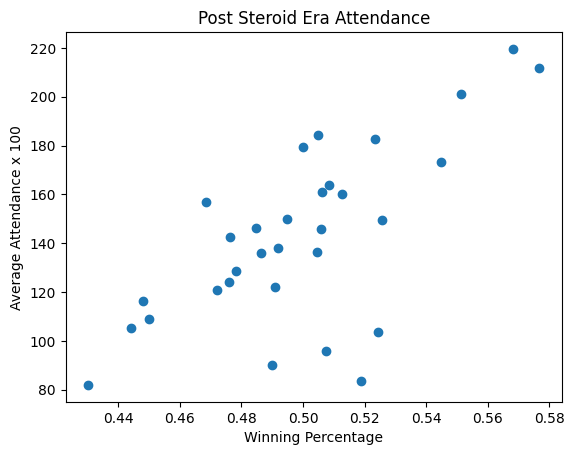

In [119]:
xpoints = post_agg_data['win_pct']
ypoints = (post_agg_data['total_attendance'] / post_agg_data['total_g']) / 100

plt.scatter(xpoints, ypoints)
plt.xlabel('Winning Percentage')
plt.ylabel('Average Attendance x 100')
plt.title('Post Steroid Era Attendance')
plt.show()

In [33]:
# helper function to aggregate the data
# the function takes in a dataframe, list and era
# for each tuple in the list, the function creates a 
# new column in an agg_data df that consists of
# the aggregated date from the df correspoding to the era

def get_agg_data(df, stats_list, era):
    agg_df = pd.DataFrame()

    for stat in stats_list:
        col_name = stat[0] + stat[1]
        agg_df[stat[0] + stat[1]] = df.groupby(['yearID']).agg(
            col_name = (stat[0], stat[1])
        )

    if era == 'pre':
        agg_df['year'] = agg_df.index - 1972
    elif era == 'roid':
        agg_df['year'] = agg_df.index - 1993
    elif era == 'post':
        agg_df['year'] = agg_df.index - 2003

    return agg_df

In [63]:
stat_list = test_list = [('HR', 'sum'),('HR', 'mean'),('AB','sum'),('SO','sum'),('2B','sum'),('3B','sum'),('G','sum')]

pre_agg_batting = get_agg_data(pre_batting, stat_list, 'pre')
roid_agg_batting = get_agg_data(roid_batting, stat_list, 'roid')
post_agg_batting = get_agg_data(post_batting, stat_list, 'post')

In [64]:
pre_agg_batting.head()

,HRsum,HRmean,ABsum,SOsum,2Bsum,3Bsum,Gsum,year
yearID,,,,,,,,
1973,3102,3.477578,132363,20358.0,5224,790,50150,1
1974,2649,2.898249,132256,19495.0,5206,847,51207,2
1975,2698,2.974642,131473,19280.0,5443,887,50682,3
1976,2235,2.522573,131525,18745.0,5240,966,50421,4
1977,3644,3.703252,143975,21722.0,6441,1170,55789,5


In [103]:
roid_avg_HR = (roid_agg_batting['HRsum'].sum()) * 2/ roid_agg_batting['ABsum'].sum()
pre_avg_HR = (pre_agg_batting['HRsum'].sum()) * 2/ pre_agg_batting['ABsum'].sum()
post_avg_HR = (post_agg_batting['HRsum'].sum()) * 2/ post_agg_batting['ABsum'].sum()

roid_avg_HR = str(round(roid_avg_HR, 2))
pre_avg_HR = str(round(pre_avg_HR, 2))
post_avg_HR = str(round(post_avg_HR, 2))

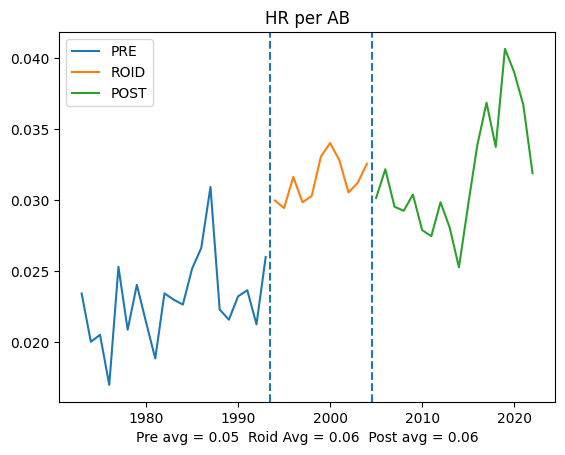

In [104]:
ypoints = pre_agg_batting['HRsum'] / pre_agg_batting['ABsum']
xpoints = pre_agg_batting['year'] + 1972

ypoints2 = roid_agg_batting['HRsum'] / roid_agg_batting['ABsum']
xpoints2 = roid_agg_batting['year'] + 1993

ypoints3 = post_agg_batting['HRsum'] / post_agg_batting['ABsum']
xpoints3 = post_agg_batting['year'] + 2003

plt.plot(xpoints, ypoints)
plt.plot(xpoints2, ypoints2)
plt.plot(xpoints3, ypoints3)
plt.title('HR per AB')
plt.legend(["PRE", "ROID", "POST"], loc='upper left')
plt.axvline(x = 1993.5, linestyle='--')
plt.axvline(x = 2004.5, linestyle='--')
plt.xlabel('Pre avg = ' + pre_avg_HR + '  Roid Avg = ' + roid_avg_HR + '  Post avg = ' + post_avg_HR)
plt.show()

In [101]:
roid_avg_HR = (roid_agg_batting['HRsum'].sum()) * 2/ roid_agg_batting['SOsum'].sum()
pre_avg_HR = (pre_agg_batting['HRsum'].sum()) * 2/ pre_agg_batting['SOsum'].sum()
post_avg_HR = (post_agg_batting['HRsum'].sum()) * 2/ post_agg_batting['SOsum'].sum()

roid_avg_HR = str(round(roid_avg_HR, 2))
pre_avg_HR = str(round(pre_avg_HR, 2))
post_avg_HR = str(round(post_avg_HR, 2))

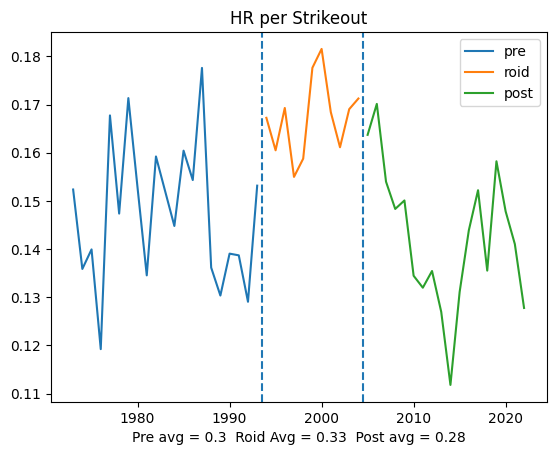

In [102]:
ypoints = pre_agg_batting['HRsum'] / pre_agg_batting['SOsum']
xpoints = pre_agg_batting['year'] + 1972

ypoints2 = roid_agg_batting['HRsum'] / roid_agg_batting['SOsum']
xpoints2 = roid_agg_batting['year'] + 1993

ypoints3 = post_agg_batting['HRsum'] / post_agg_batting['SOsum']
xpoints3 = post_agg_batting['year'] + 2003

plt.plot(xpoints, ypoints)
plt.plot(xpoints2, ypoints2)
plt.plot(xpoints3, ypoints3)
plt.title('HR per Strikeout')
plt.legend(["pre", "roid", "post"], loc='upper right')
plt.axvline(x = 1993.5, linestyle='--')
plt.axvline(x = 2004.5, linestyle='--')
plt.xlabel('Pre avg = ' + pre_avg_HR + '  Roid Avg = ' + roid_avg_HR + '  Post avg = ' + post_avg_HR)
plt.show()

In [75]:
roid_avg_3b = (roid_agg_batting['3Bsum'].sum()) * 2/ roid_agg_batting['Gsum'].sum()
pre_avg_3b = (pre_agg_batting['3Bsum'].sum()) * 2/ pre_agg_batting['Gsum'].sum()
post_avg_3b = (post_agg_batting['3Bsum'].sum()) * 2/ post_agg_batting['Gsum'].sum()

roid_avg_3b = str(round(roid_avg_3b, 2))
pre_avg_3b = str(round(pre_avg_3b, 2))
post_avg_3b = str(round(post_avg_3b, 2))

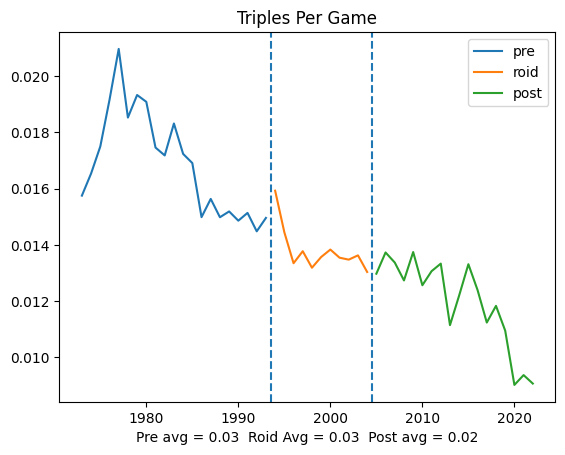

In [95]:
ypoints = pre_agg_batting['3Bsum']/pre_agg_batting['Gsum']
xpoints = pre_agg_batting['year'] + 1972

ypoints2 = roid_agg_batting['3Bsum'] / roid_agg_batting['Gsum']
xpoints2 = roid_agg_batting['year'] + 1993

ypoints3 = post_agg_batting['3Bsum'] / post_agg_batting['Gsum']
xpoints3 = post_agg_batting['year'] + 2003

plt.plot(xpoints, ypoints)
plt.plot(xpoints2, ypoints2)
plt.plot(xpoints3, ypoints3)
plt.title('Triples Per Game')
plt.legend(["pre", "roid", "post"], loc='upper right')
plt.xlabel('Pre avg = ' + pre_avg_3b + '  Roid Avg = ' + roid_avg_3b + '  Post avg = ' + post_avg_3b)
plt.axvline(x = 1993.5, linestyle='--')
plt.axvline(x = 2004.5, linestyle='--')
plt.show()

In [73]:
roid_avg_2b = (roid_agg_batting['2Bsum'].sum()) * 2/ roid_agg_batting['Gsum'].sum()
pre_avg_2b = (pre_agg_batting['2Bsum'].sum()) * 2/ pre_agg_batting['Gsum'].sum()
post_avg_2b = (post_agg_batting['2Bsum'].sum()) * 2/ post_agg_batting['Gsum'].sum()

roid_avg_2b = str(round(roid_avg_2b, 2))
pre_avg_2b = str(round(pre_avg_2b, 2))
post_avg_2b = str(round(post_avg_2b, 2))

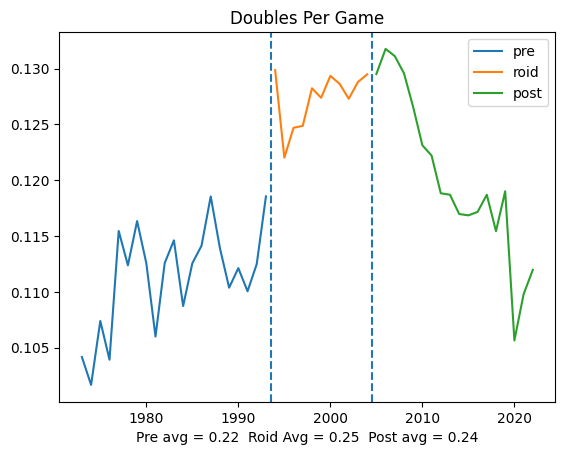

In [94]:
ypoints = pre_agg_batting['2Bsum']/pre_agg_batting['Gsum']
xpoints = pre_agg_batting['year'] + 1972

ypoints2 = roid_agg_batting['2Bsum'] / roid_agg_batting['Gsum']
xpoints2 = roid_agg_batting['year'] + 1993

ypoints3 = post_agg_batting['2Bsum'] / post_agg_batting['Gsum']
xpoints3 = post_agg_batting['year'] + 2003

plt.plot(xpoints, ypoints)
plt.plot(xpoints2, ypoints2)
plt.plot(xpoints3, ypoints3)
plt.title('Doubles Per Game')
plt.legend(["pre", "roid", "post"], loc='upper right')
plt.xlabel('Pre avg = ' + pre_avg_2b + '  Roid Avg = ' + roid_avg_2b + '  Post avg = ' + post_avg_2b)
plt.axvline(x = 1993.5, linestyle='--')
plt.axvline(x = 2004.5, linestyle='--')

plt.show()

In [70]:
roid_avg_xb = (roid_agg_batting['2Bsum'].sum() + roid_agg_batting['3Bsum'].sum()) * 2/ roid_agg_batting['Gsum'].sum()
pre_avg_xb = (pre_agg_batting['2Bsum'].sum() + pre_agg_batting['3Bsum'].sum()) * 2/ pre_agg_batting['Gsum'].sum()
post_avg_xb = (post_agg_batting['2Bsum'].sum() + post_agg_batting['3Bsum'].sum()) * 2/ post_agg_batting['Gsum'].sum()

roid_avg_xb = str(round(roid_avg_xb, 2))
pre_avg_xb = str(round(pre_avg_xb, 2))
post_avg_xb = str(round(post_avg_xb, 2))

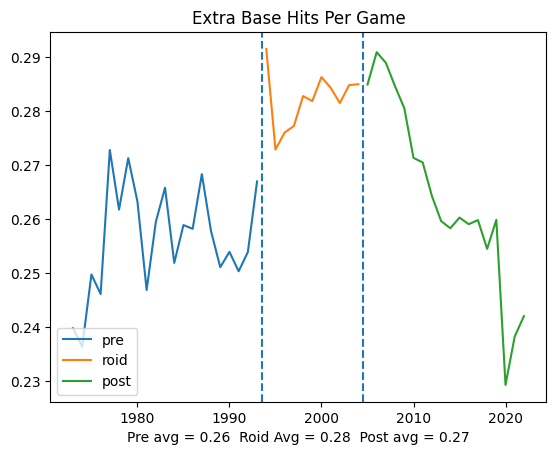

In [99]:
ypoints = (pre_agg_batting['2Bsum'] + pre_agg_batting['3Bsum']) * 2/pre_agg_batting['Gsum']
xpoints = pre_agg_batting['year'] + 1972

ypoints2 = (roid_agg_batting['2Bsum'] + roid_agg_batting['3Bsum']) * 2/ roid_agg_batting['Gsum']
xpoints2 = roid_agg_batting['year'] + 1993

ypoints3 = (post_agg_batting['2Bsum'] + post_agg_batting['3Bsum']) * 2 / post_agg_batting['Gsum']
xpoints3 = post_agg_batting['year'] + 2003

plt.plot(xpoints, ypoints)
plt.plot(xpoints2, ypoints2)
plt.plot(xpoints3, ypoints3)
plt.title('Extra Base Hits Per Game')
plt.legend(["pre", "roid", "post"], loc='lower left')
plt.xlabel('Pre avg = ' + pre_avg_xb + '  Roid Avg = ' + roid_avg_xb + '  Post avg = ' + post_avg_xb)
plt.axvline(x = 1993.5, linestyle='--')
plt.axvline(x = 2004.5, linestyle='--')

plt.show()